### Analysis on London Weather (1979-2020)

In [1]:
import time
begin = time.time()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import calendar
from Constants import *

%matplotlib inline

In [3]:
df = pd.read_csv(DATA_SET_FILE)
#df

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
date,15341.0,1.999567e+07,121217.558277,19790101.0,19890702.0,20000101.0,20100702.0,20201231.0
cloud_cover,15322.0,5.268242e+00,2.070072,0.0,4.0,6.0,7.0,9.0
sunshine,15341.0,4.350238e+00,4.028339,0.0,0.5,3.5,7.2,16.0
global_radiation,15322.0,1.187570e+02,88.898272,8.0,41.0,95.0,186.0,402.0
max_temp,15335.0,1.538878e+01,6.554754,-6.2,10.5,15.0,20.3,37.9
mean_temp,15305.0,1.147551e+01,5.729709,-7.6,7.0,11.4,16.0,29.0
min_temp,15339.0,7.559867e+00,5.326756,-11.8,3.5,7.8,11.8,22.3
precipitation,15335.0,1.668634e+00,3.738540,0.0,0.0,0.0,1.6,61.8
pressure,15337.0,1.015366e+05,1049.722604,95960.0,100920.0,101620.0,102240.0,104820.0
snow_depth,13900.0,3.798561e-02,0.545633,0.0,0.0,0.0,0.0,22.0


In [5]:
df.shape

(15341, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [7]:
df.isna().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

#### Visualising correlation between features

In [8]:
df.corr()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,1.000000,-0.107060,0.009067,0.008132,0.086843,0.094389,0.095322,0.008122,-0.013423,-0.043738
cloud_cover,-0.107060,1.000000,-0.738291,-0.485973,-0.212224,-0.110556,0.048838,0.235269,-0.241955,-0.001256
sunshine,0.009067,-0.738291,1.000000,0.852632,0.472182,0.396535,0.219082,-0.231636,0.226943,-0.034222
global_radiation,0.008132,-0.485973,0.852632,1.000000,0.690946,0.635432,0.478119,-0.162668,0.150078,-0.061781
max_temp,0.086843,-0.212224,0.472182,0.690946,1.000000,0.912200,0.810514,-0.071799,0.100455,-0.130594
mean_temp,0.094389,-0.110556,0.396535,0.635432,0.912200,1.000000,0.955593,-0.010462,0.004764,-0.154945
min_temp,0.095322,0.048838,0.219082,0.478119,0.810514,0.955593,1.000000,0.037233,-0.074274,-0.157882
precipitation,0.008122,0.235269,-0.231636,-0.162668,-0.071799,-0.010462,0.037233,1.000000,-0.349456,-0.001352
pressure,-0.013423,-0.241955,0.226943,0.150078,0.100455,0.004764,-0.074274,-0.349456,1.000000,-0.021229
snow_depth,-0.043738,-0.001256,-0.034222,-0.061781,-0.130594,-0.154945,-0.157882,-0.001352,-0.021229,1.000000


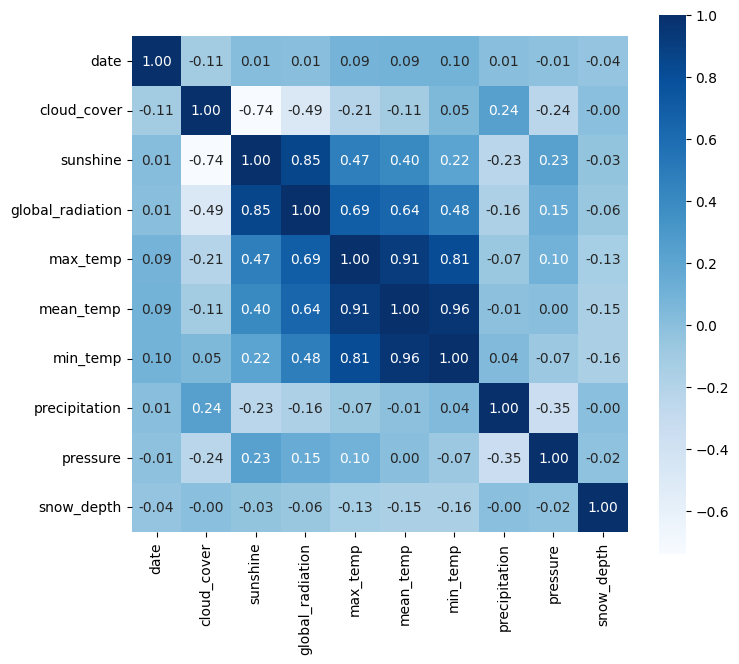

In [9]:
corrmat = df.corr()

plt.figure(figsize=(8, 7))

hm = sns.heatmap(corrmat,
                 cbar = True,
                 annot = True,
                 square = True,
                 fmt = '.2f',
                 annot_kws = {'size': 10}, 
                 yticklabels = df.columns, 
                 xticklabels = df.columns, 
                 cmap = "Blues"                 
                 )

From our Correlation matrix;
- There's strong correlation between cloud_cover and sunshine.
- There's strong correlation between sunshine and global_radiation.
- There's strong correlation between max_temp and both min_temp and mean_temp, as mean_temp is the average of the two.
- date, precipitation and snow_depth correlates poorly with all other variables

#### Observing trends in data

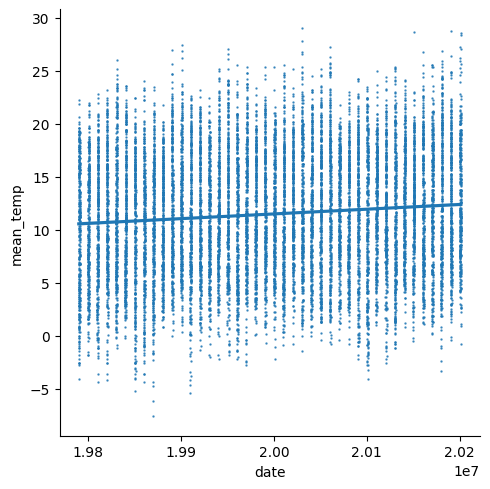

In [10]:
sns.lmplot(x = "date", y = "mean_temp", data = df, scatter_kws={"s":0.5})

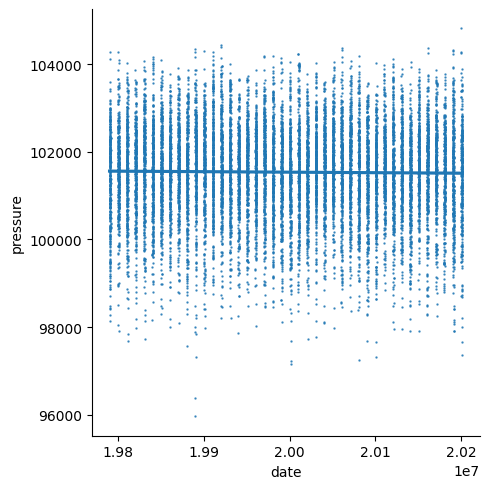

In [11]:
sns.lmplot(x = "date", y = "pressure", data = df, scatter_kws={"s":0.5})

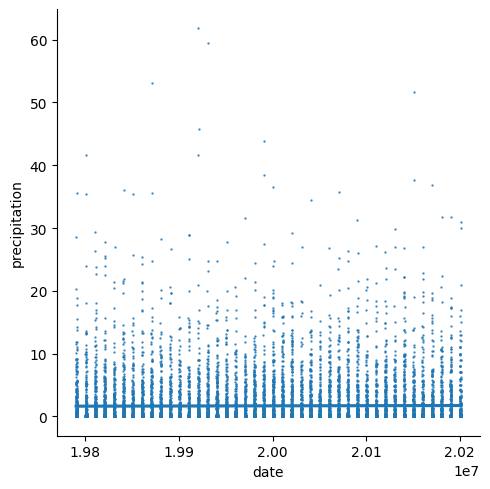

In [12]:
sns.lmplot(x = "date", y = "precipitation", data = df, scatter_kws={"s":0.5})

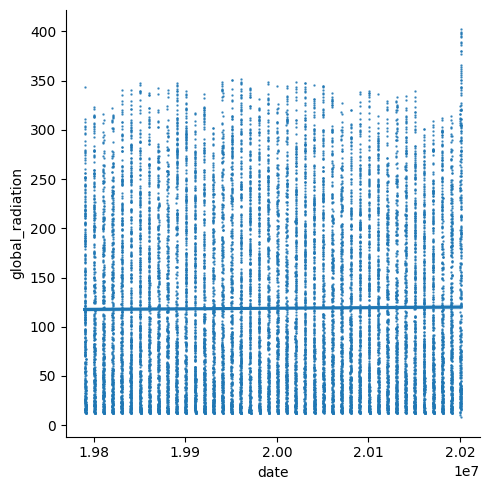

In [13]:
sns.lmplot(x = "date", y = "global_radiation", data = df, scatter_kws={"s":0.5})

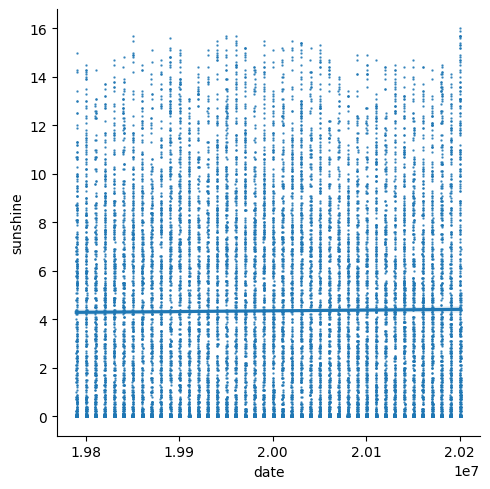

In [14]:
sns.lmplot(x = "date", y = "sunshine", data = df, scatter_kws={"s":0.5})

#### Visualising Correlation between selected variable and others

<Axes: >

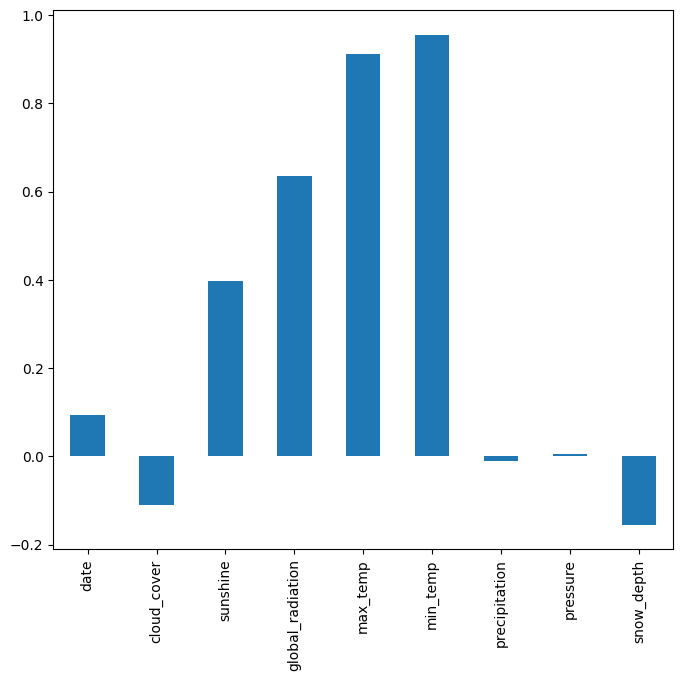

In [15]:
plt.figure(figsize=(8, 7))
selected_column = 'mean_temp'
correlation = df.drop(columns=[selected_column]).apply(lambda x: x.corr(df[selected_column]))
correlation.plot(kind='bar')

<Axes: >

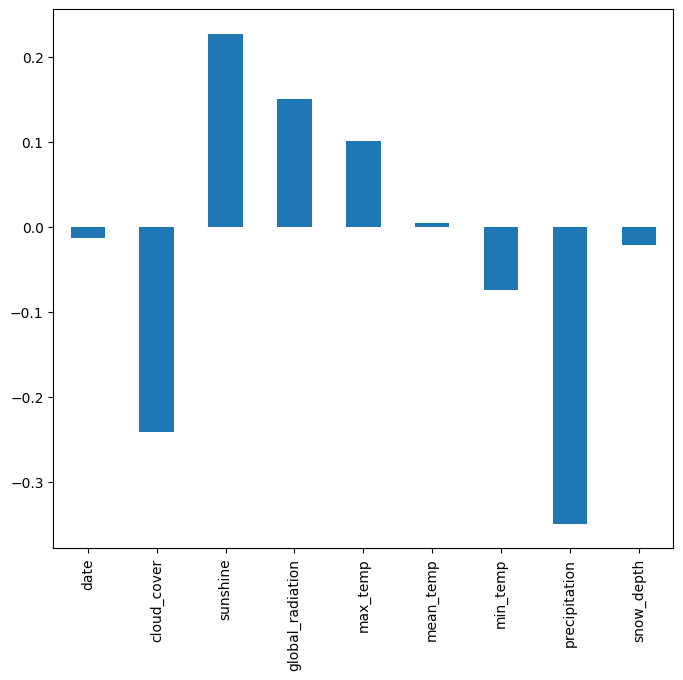

In [16]:
plt.figure(figsize=(8,7))
selected_column = 'pressure'
correlation = df.drop(columns=[selected_column]).apply(lambda x: x.corr(df[selected_column]))
correlation.plot(kind='bar')

<Axes: >

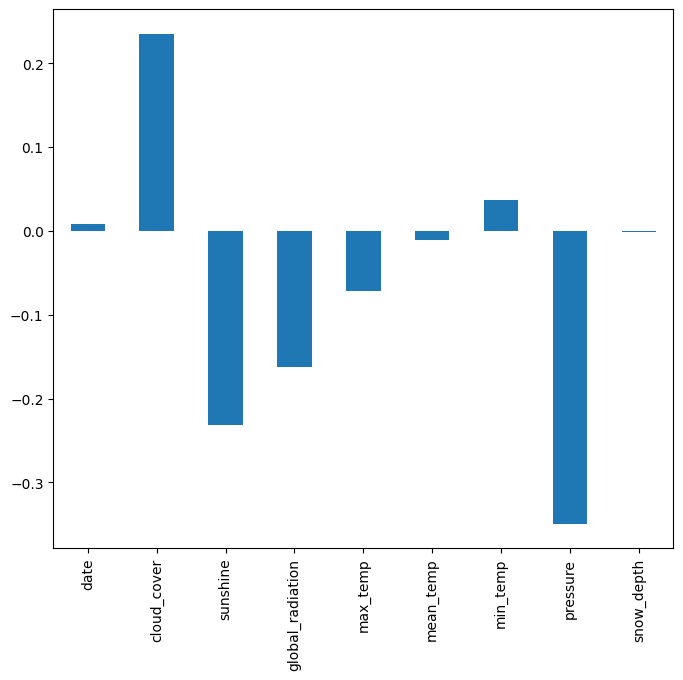

In [17]:
plt.figure(figsize=(8, 7))
selected_column = 'precipitation'
correlation = df.drop(columns=[selected_column]).apply(lambda x: x.corr(df[selected_column]))
correlation.plot(kind='bar')

<Axes: >

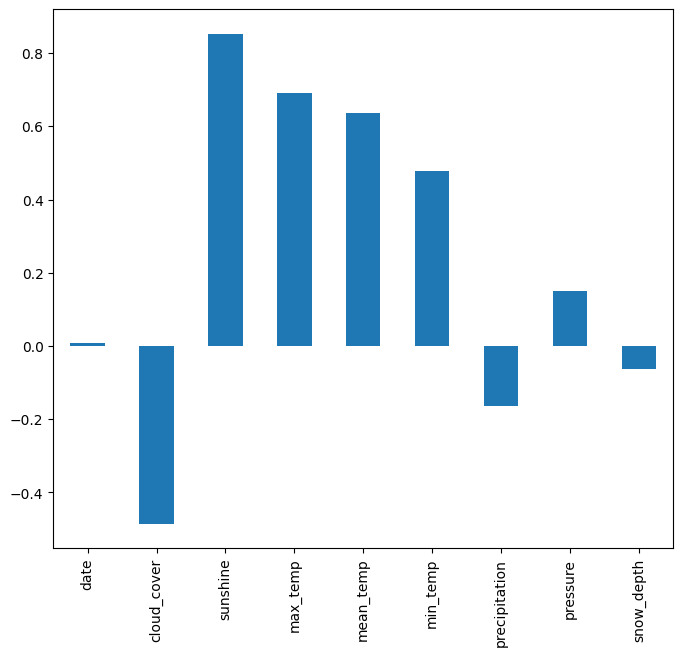

In [18]:
plt.figure(figsize=(8, 7))
selected_column = 'global_radiation'
correlation = df.drop(columns=[selected_column]).apply(lambda x: x.corr(df[selected_column]))
correlation.plot(kind='bar')

<Axes: >

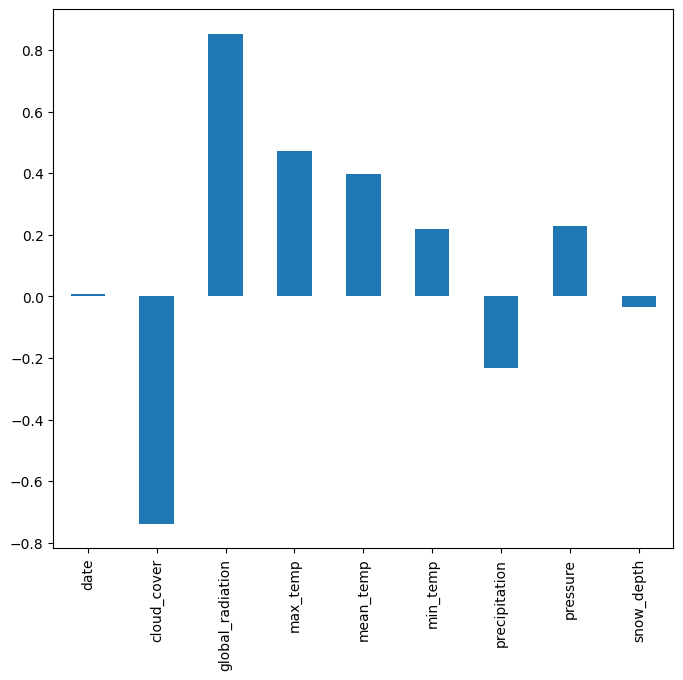

In [19]:
plt.figure(figsize=(8, 7))
selected_column = 'sunshine'
correlation = df.drop(columns=[selected_column]).apply(lambda x: x.corr(df[selected_column]))
correlation.plot(kind='bar')

<Axes: >

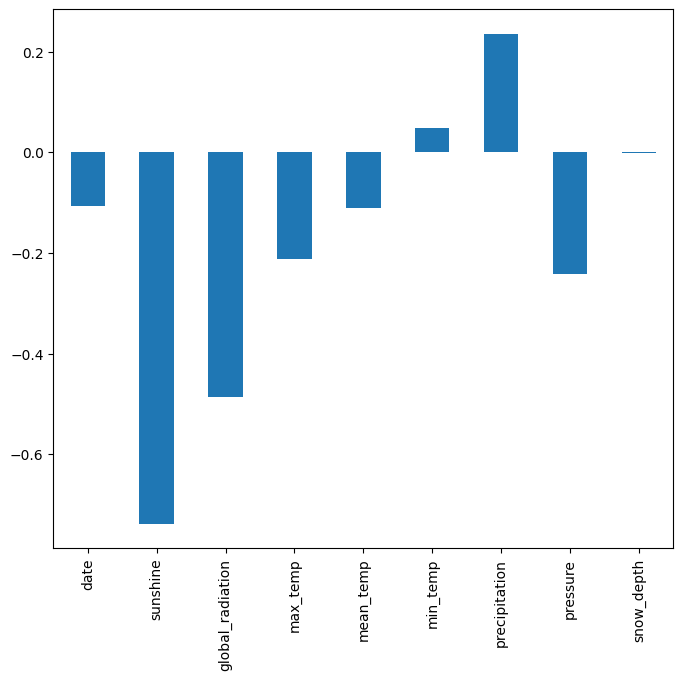

In [20]:
plt.figure(figsize=(8, 7))
selected_column = 'cloud_cover'
correlation = df.drop(columns=[selected_column]).apply(lambda x: x.corr(df[selected_column]))
correlation.plot(kind='bar')

In [21]:
# Splitting date column into year, month and day
df1 = df

df1['year'] = df['date'].astype(str).str[:4]
df1['month'] = df['date'].astype(str).str[4:6]
df1['day'] = df['date'].astype(str).str[6:]

In [22]:
df1[['day', 'month', 'year']] = df1[['day', 'month', 'year']].astype(int)

In [23]:
weather_features = df1.select_dtypes(exclude = 'object').columns

In [24]:
for x in weather_features:
    print(x, len(df1[x].unique()))

date 15341
cloud_cover 11
sunshine 160
global_radiation 361
max_temp 375
mean_temp 322
min_temp 297
precipitation 263
pressure 643
snow_depth 20
year 42
month 12
day 31


In [25]:
mean_max = df1['max_temp'].mean()
mean_min = df1['min_temp'].mean()
mean_temp = df1['mean_temp'].mean()
mean_cld = df1['cloud_cover'].median()
mean_glorad = df1['global_radiation'].mean()
mean_prec = df1['precipitation'].mean()
mean_press = df1['pressure'].mean()
#mean_snwdpt = df['snow_depth'].mean()

df1['max_temp'].fillna(mean_max, inplace= True)
df1['min_temp'].fillna(mean_min, inplace= True)
df1['mean_temp'].fillna(mean_temp, inplace= True)
df1['cloud_cover'].fillna(mean_cld, inplace= True)
df1['global_radiation'].fillna(mean_glorad, inplace= True)
df1['precipitation'].fillna(mean_prec, inplace= True)
df1['pressure'].fillna(mean_press, inplace= True)
#df['snow_depth'].fillna(mean_snwdpt, inplace=True)

df1.isna().sum()

date                   0
cloud_cover            0
sunshine               0
global_radiation       0
max_temp               0
mean_temp              0
min_temp               0
precipitation          0
pressure               0
snow_depth          1441
year                   0
month                  0
day                    0
dtype: int64

#### Pie Chart of Temperature Distribution

In [26]:
temp_ranges = {'Freezing Cold': (-float('inf'), 0), 'Frigid Cold': (0, 6), 'Cold': (6, 14), 'Warm': (14, 19), 
               'Very Warm': (19, 24), 'Hot': (24, 34), 'Very Hot': (34, float('inf'))}

london_temp = df1.groupby(pd.cut(df['mean_temp'], 
                                bins=[-float('inf')]+[i[1] for i in temp_ranges.values()], 
                                labels=temp_ranges.keys())).size().to_dict()
colors = {'Freezing Cold': '#afafaf', 'Frigid Cold': '#999999', 'Cold': '#666666', 'Warm': '#333333',
          'Very Warm': '#282828', 'Hot': '#111111', 'Very Hot': '#000000'}

fig = go.Figure(data=[go.Pie(labels=list(london_temp.keys()), values=list(london_temp.values()),
                             marker=dict(colors=list(colors.values())))])
fig.update_layout(title='Mean temperature(1979-2020)')
fig.show()


In [27]:
monthly_weather_df = df1.groupby(['year', 'month'], as_index = False)[weather_features].mean()

monthly_weather_df['snow_depth'] = monthly_weather_df.snow_depth.fillna(0)

monthly_weather_df['date'] = pd.to_datetime(monthly_weather_df[['year', 'month']].assign(DAY = 1))

monthly_weather_data = monthly_weather_df.copy()

monthly_weather_data.month = monthly_weather_data['month'].astype(int)
monthly_weather_data['month'] = monthly_weather_data['month'].apply(lambda x: calendar.month_abbr[x])


#### Change in Mean Temperature in London over the Years

plt.figure(figsize=(20,10))
sns.countplot(x = 'date', data = ['max_temp'], hue = 'max_temp')
plt.show()

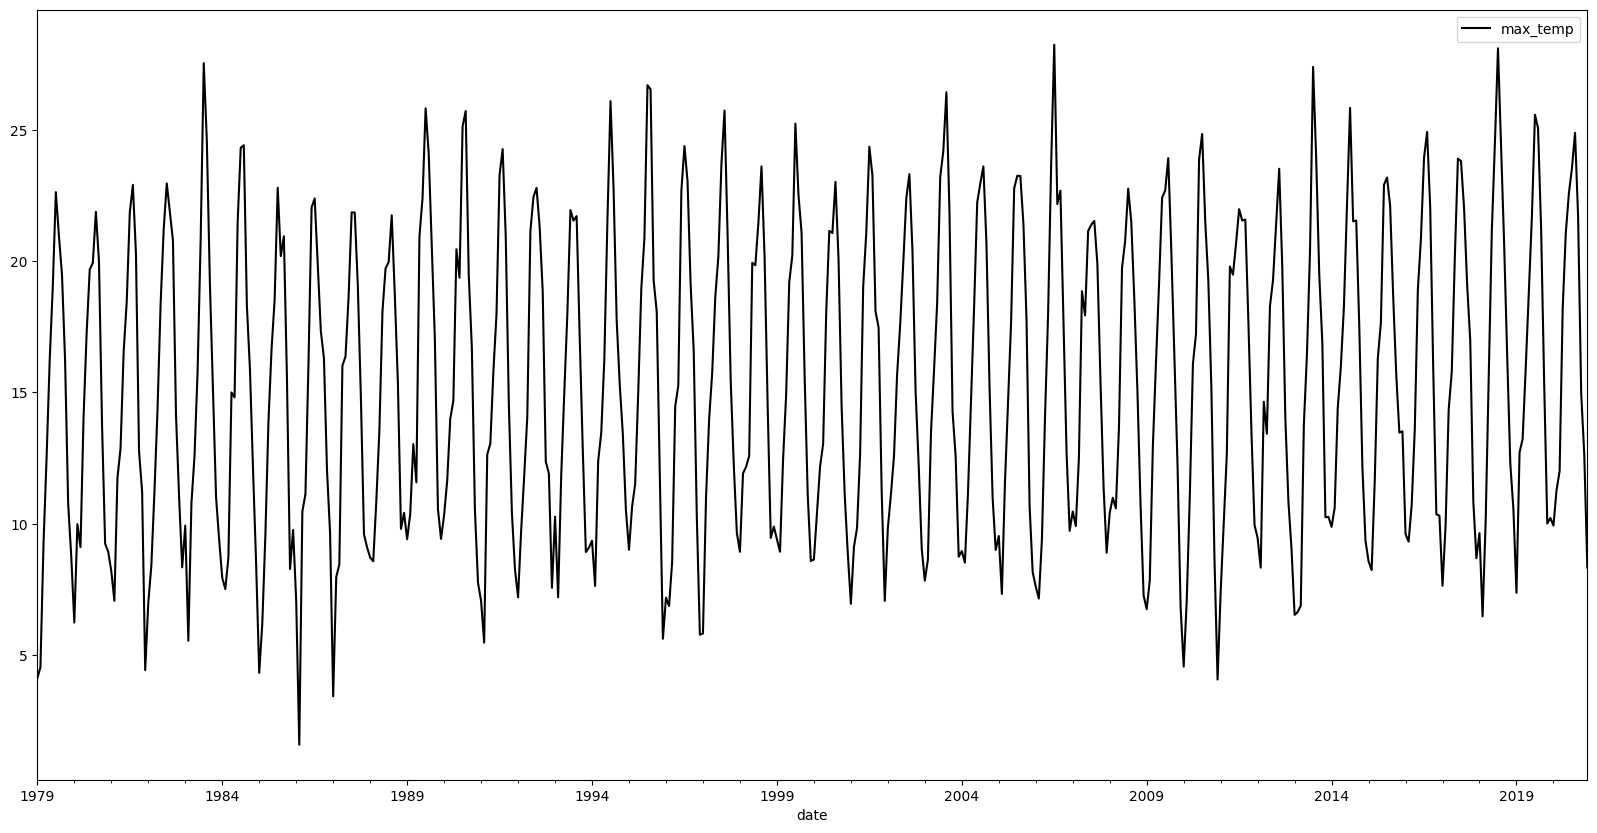

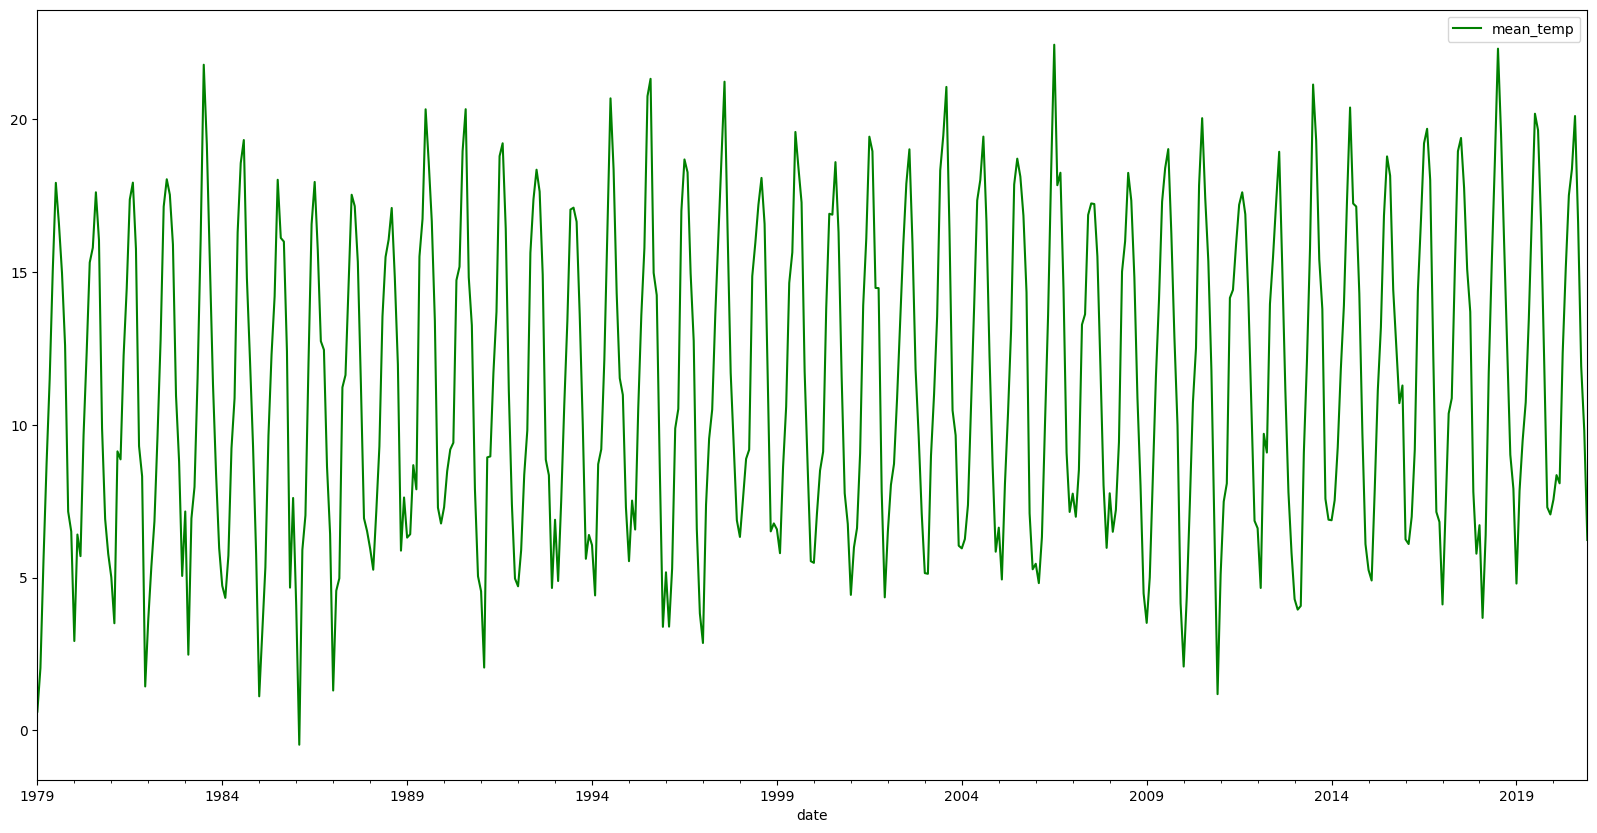

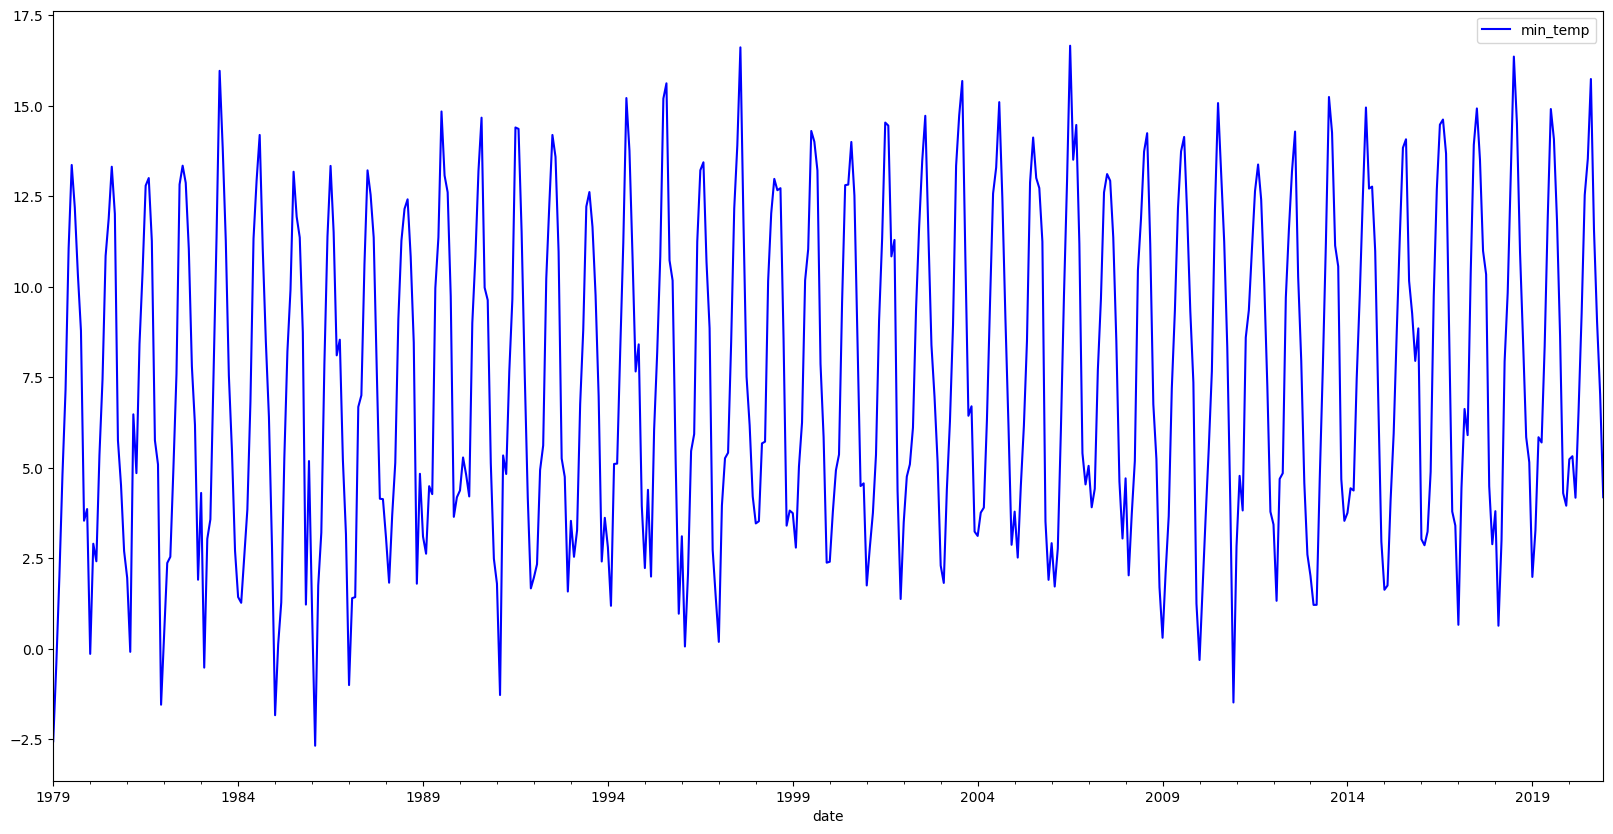

In [28]:
monthly_weather_df.plot(x = 'date', y = ['max_temp'], kind = 'line',color='black', figsize = (20,10))
plt.show()
monthly_weather_df.plot(x = 'date', y = ['mean_temp'], kind = 'line',color='green', figsize = (20,10))
plt.show()
monthly_weather_df.plot(x = 'date', y = ['min_temp'], kind = 'line',color='blue', figsize = (20,10))
plt.show()


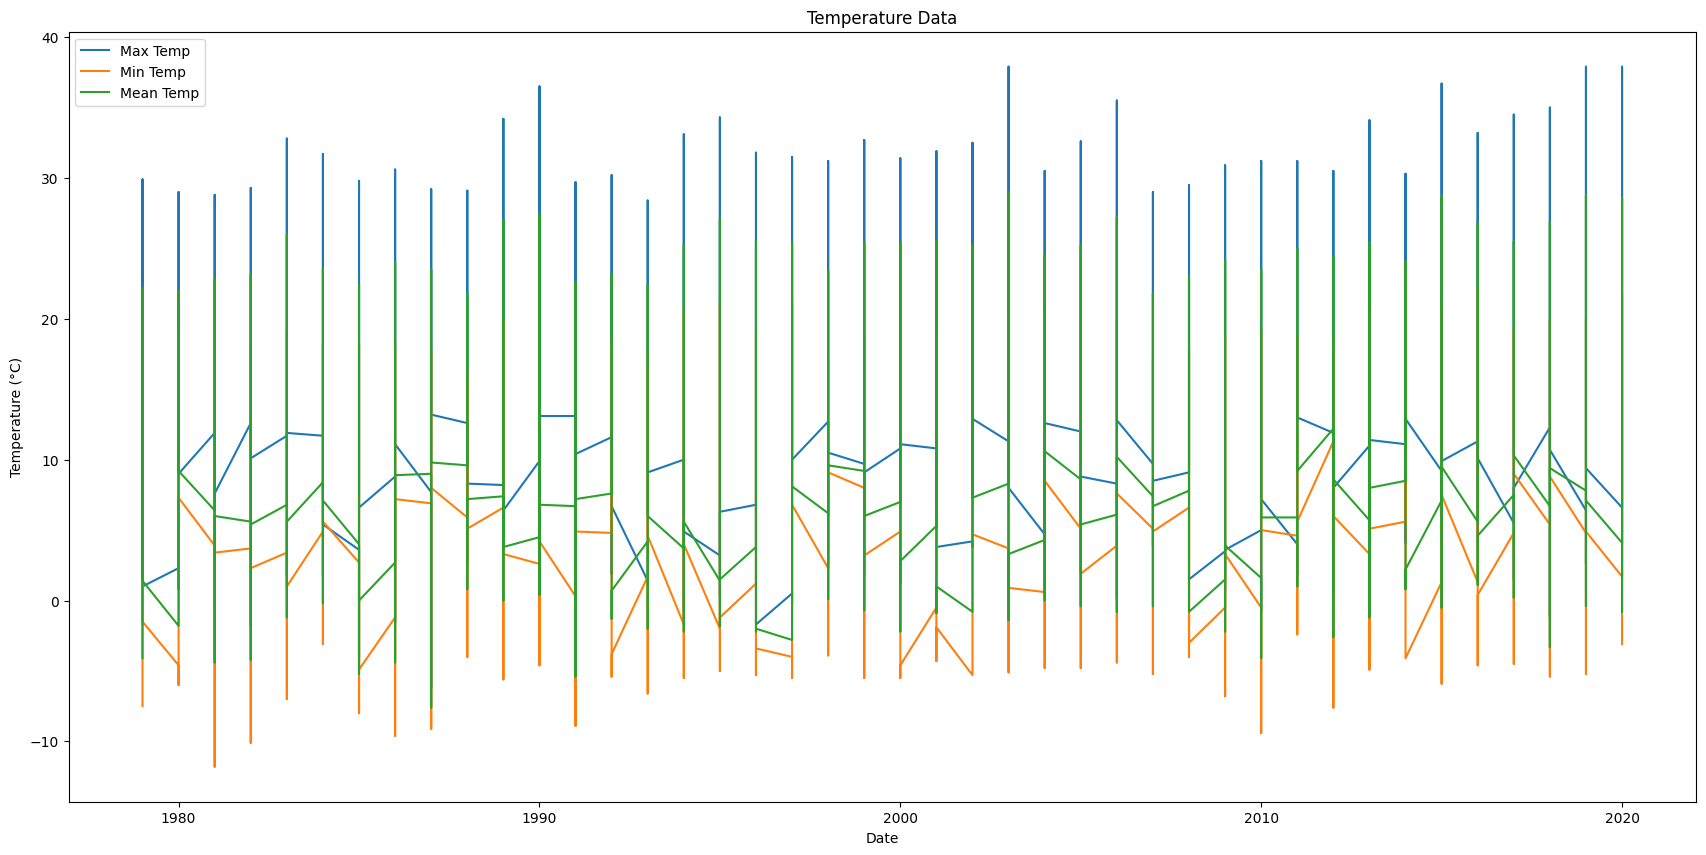

In [29]:
date = df1['year']
max_temp = df1['max_temp']
min_temp = df1['min_temp']
mean_temp = df1['mean_temp']

plt.figure(figsize=(21, 10))
plt.plot(date, max_temp, label='Max Temp')
plt.plot(date, min_temp, label='Min Temp')
plt.plot(date, mean_temp, label='Mean Temp')

plt.title('Temperature Data')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


In [30]:
yearly_df = monthly_weather_df.groupby(['year'], as_index = False)[['max_temp', 'mean_temp', 'min_temp', 'global_radiation', 'pressure', 'precipitation']].mean()

In [31]:
layout = go.Layout(
    title = "London's temperature",
    plot_bgcolor = "#FFF",
    hovermode = "x",
    hoverdistance = 100,
    spikedistance = 1000,
    xaxis=dict(
        title = "Years (1979-2020)",
        linecolor = "dimgray",
        showgrid = False,
        showspikes = True,
        spikethickness = 1,
        spikedash = 'dash',
        spikecolor = 'darkgrey',
        spikemode = 'across',
        mirror = True
    ),
    yaxis=dict(
        title = "Temperature(°C)",  
        linecolor = "dimgray",
        mirror = True
    )
)

plot = go.Figure(data = [ go.Scatter(x = yearly_df.year, y = yearly_df.max_temp, name = 'Maximum',
                                    mode = 'lines+markers', line_color = 'orange'),
                         go.Scatter(x = yearly_df.year, y = yearly_df.mean_temp, name = 'Mean', mode = 'lines+markers',
                                    line = dict(color = 'silver', dash = 'longdash')),
                         go.Scatter(x = yearly_df.year, y = yearly_df.min_temp, name = 'Minimum',
                                    mode = 'lines+markers', line_color = 'lightblue') ],
                 layout = layout)
plot.show()

#### Change in Global Radiation in London over the Years

In [32]:
layout = go.Layout(
    title = "London's Global Radiation",
        plot_bgcolor = '#fff',
            hovermode = 'x',
    
    xaxis = dict(
        title = 'Years (1979-2020)',
        linecolor = 'dimgrey',
        showgrid = False,
        showspikes = True,
        spikedash = 'dot',
        spikecolor = 'darkgrey',
        spikemode = 'across',
        spikethickness = 1,
        mirror = True 
        ),
                   
    yaxis = dict(
        title = 'Radiation (W/m2)',
        linecolor = 'dimgrey',
        showgrid = False,
        mirror = True 
        )
    )

plot = go.Figure(data = [go.Scatter(
    x = yearly_df.year,
    y = yearly_df.global_radiation,
    mode = 'lines+markers',
    marker = dict(color = yearly_df.global_radiation, colorscale = 'ylorrd', size = 10),
    line_color = 'lightgrey')],
    layout = layout)
plot.show()

#### Pressure over the years

In [33]:
layout = go.Layout(
    title = "London's Pressure throughout the years",
        plot_bgcolor = '#fff',
            hovermode = 'x',
    
    xaxis = dict(
        title = 'Years (1979-2020)',
        linecolor = 'dimgrey',
        showgrid = False,
        showspikes = True,
        spikedash = 'dot',
        spikecolor = 'darkgrey',
        spikemode = 'across',
        spikethickness = 1,
        mirror = True 
        ),
                   
    yaxis = dict(
        title = 'Radiation (W/m2)',
        linecolor = 'dimgrey',
        showgrid = False,
        mirror = True 
        )
    )

plot = go.Figure(data = [go.Scatter(
    x = yearly_df.year,
    y = yearly_df.pressure,
    mode = 'lines+markers',
    marker = dict(color = yearly_df.global_radiation, colorscale = 'ylorrd', size = 10),
    line_color = 'lightgrey')],
    layout = layout)
plot.show()

#### Precipitation over the years

In [34]:
layout = go.Layout(
    title = "London's Precipitation throughout the years",
        plot_bgcolor = '#fff',
            hovermode = 'x',
    
    xaxis = dict(
        title = 'Years (1979-2020)',
        linecolor = 'dimgrey',
        showgrid = False,
        showspikes = True,
        spikedash = 'dot',
        spikecolor = 'darkgrey',
        spikemode = 'across',
        spikethickness = 1,
        mirror = True 
        ),
                   
    yaxis = dict(
        title = 'Radiation (W/m2)',
        linecolor = 'dimgrey',
        showgrid = False,
        mirror = True 
        )
    )

plot = go.Figure(data = [go.Scatter(
    x = yearly_df.year,
    y = yearly_df.precipitation,
    mode = 'lines+markers',
    marker = dict(color = yearly_df.global_radiation, colorscale = 'ylorrd', size = 10),
    line_color = 'lightgrey')],
    layout = layout)
plot.show()

#### Snow depth over the years

In [35]:
fig = px.scatter(monthly_weather_data, x="year", y="month",
                 color = 'snow_depth', color_continuous_scale=['lightblue', 'mediumblue'],
                 size="snow_depth", size_max=60, opacity = 0.6, title = "Snow depth in London")
fig.update_layout(height = 600, width = 1000, plot_bgcolor = 'white')
fig.update_xaxes(title = 'Years (1979-2020)', showgrid = False, linecolor = 'dimgrey', mirror = True)
fig.update_yaxes(title = 'Months', showgrid = False, zeroline = False, linecolor = 'dimgrey', mirror = True)
fig.update_coloraxes(colorbar = dict(title = 'Snow depth(cm)'))
fig.show()

In [36]:
df.isnull().sum()

date                   0
cloud_cover            0
sunshine               0
global_radiation       0
max_temp               0
mean_temp              0
min_temp               0
precipitation          0
pressure               0
snow_depth          1441
year                   0
month                  0
day                    0
dtype: int64

In [37]:
df = df.dropna(axis = 0)
df = df.drop(['date'], axis=1)

Text(0, 0.5, 'global_radiation')

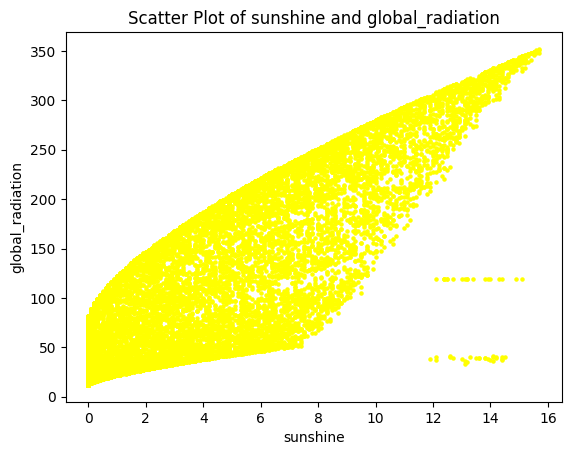

In [38]:
from pandas._libs.tslibs.period import IncompatibleFrequency
sunshine = df["sunshine"]
global_radiation = df["global_radiation"]

plt.title("Scatter Plot of sunshine and global_radiation")
plt.scatter(sunshine,global_radiation, color="yellow", s=5)
plt.xlabel("sunshine")
plt.ylabel("global_radiation")

In [41]:
end = time.time()
total = end - begin
print("Total: {:0.3f} secs".format(total))

Total: 23.809 secs
